In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import nibabel as nib
from tensorflow import keras
import tensorflow_addons as tfa
import random
from scipy import ndimage
from tensorflow import keras
import os

In [3]:
df = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/train.csv")

In [4]:
n_image_list = np.arange(0, df.shape[0])
random_n_image_list = np.random.choice(n_image_list, df.shape[0], replace=False)

In [5]:
def data_gen():
    df = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/train.csv")
    for i in random_n_image_list:
        path = "../input/cervical-ct-preprocessing/" + str(df.iloc[i]["StudyInstanceUID"]) +".nii.gz"
        try:
            ct = nib.load(path)
            ct = ct.get_fdata()
            for pic in range(128):
                yield ({"input_1": np.stack([ct[pic,:,:],ct[pic,:,:],ct[pic,:,:]],axis=-1)}, 
                       {'co': df.iloc[i]["patient_overall"], 
                                        'c1': df.iloc[i]["C1"],
                                        'c2': df.iloc[i]["C2"],
                                        'c3': df.iloc[i]["C3"],
                                        'c4': df.iloc[i]["C4"],
                                        'c5': df.iloc[i]["C5"],
                                        'c6': df.iloc[i]["C6"],
                                        'c7': df.iloc[i]["C7"],},
                      {'co': 3, 
                                    'c1': 1,
                                    'c2': 1,
                                    'c3': 1,
                                    'c4': 1,
                                    'c5': 1,
                                    'c6': 1,
                                    'c7': 1})
                
        except:
            continue

            
            
def test_gen():
    df = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/train.csv")
    for i in random_n_image_list[1800:]:
        path = "../input/cervical-ct-preprocessing/" + str(df.iloc[i]["StudyInstanceUID"]) +".nii.gz"
        try:
            ct = nib.load(path)
            ct = ct.get_fdata()
            for pic in range(128):
                yield ({"input_1": np.stack([ct[pic,:,:],ct[pic,:,:],ct[pic,:,:]],axis=-1)}, 
                       {'co': df.iloc[i]["patient_overall"], 
                                        'c1': df.iloc[i]["C1"],
                                        'c2': df.iloc[i]["C2"],
                                        'c3': df.iloc[i]["C3"],
                                        'c4': df.iloc[i]["C4"],
                                        'c5': df.iloc[i]["C5"],
                                        'c6': df.iloc[i]["C6"],
                                        'c7': df.iloc[i]["C7"],},
                       {'co': 3, 
                                    'c1': 1,
                                    'c2': 1,
                                    'c3': 1,
                                    'c4': 1,
                                    'c5': 1,
                                    'c6': 1,
                                    'c7': 1})
        except:
            continue
            
dataset = tf.data.Dataset.from_generator(
     data_gen,
     ({"input_1":tf.float32}, 
     {'co':tf.int8,
     'c1':tf.int8,
     'c2':tf.int8,
     'c3':tf.int8,
     'c4':tf.int8,
     'c5':tf.int8,
     'c6':tf.int8,
     'c7':tf.int8},
     {'co':tf.int8,
     'c1':tf.int8,
     'c2':tf.int8,
     'c3':tf.int8,
     'c4':tf.int8,
     'c5':tf.int8,
     'c6':tf.int8,
     'c7':tf.int8}),
    ({"input_1":tf.TensorShape([128,128,3])}, 
     {"co": tf.TensorShape([]), 
     "c1": tf.TensorShape([]),
     "c2": tf.TensorShape([]),
     "c3": tf.TensorShape([]),
     "c4": tf.TensorShape([]),
     "c5": tf.TensorShape([]),
     "c6": tf.TensorShape([]),
     "c7": tf.TensorShape([])},
    {"co": tf.TensorShape([]), 
     "c1": tf.TensorShape([]),
     "c2": tf.TensorShape([]),
     "c3": tf.TensorShape([]),
     "c4": tf.TensorShape([]),
     "c5": tf.TensorShape([]),
     "c6": tf.TensorShape([]),
     "c7": tf.TensorShape([])})
)

testset = tf.data.Dataset.from_generator(
     test_gen,
     ({"input_1":tf.float32}, 
     {'co':tf.int8,
     'c1':tf.int8,
     'c2':tf.int8,
     'c3':tf.int8,
     'c4':tf.int8,
     'c5':tf.int8,
     'c6':tf.int8,
     'c7':tf.int8},
     {'co':tf.int8,
     'c1':tf.int8,
     'c2':tf.int8,
     'c3':tf.int8,
     'c4':tf.int8,
     'c5':tf.int8,
     'c6':tf.int8,
     'c7':tf.int8}),
    ({"input_1":tf.TensorShape([128,128,3])}, 
     {"co": tf.TensorShape([]), 
     "c1": tf.TensorShape([]),
     "c2": tf.TensorShape([]),
     "c3": tf.TensorShape([]),
     "c4": tf.TensorShape([]),
     "c5": tf.TensorShape([]),
     "c6": tf.TensorShape([]),
     "c7": tf.TensorShape([])},
    {"co": tf.TensorShape([]), 
     "c1": tf.TensorShape([]),
     "c2": tf.TensorShape([]),
     "c3": tf.TensorShape([]),
     "c4": tf.TensorShape([]),
     "c5": tf.TensorShape([]),
     "c6": tf.TensorShape([]),
     "c7": tf.TensorShape([])})
)


dataset = (
    dataset.batch(100)
    .prefetch(1)
)

testset = (
    testset.batch(100)
    .prefetch(1)
)

2022-10-09 09:23:42.545433: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-09 09:23:42.663708: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-09 09:23:42.664913: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-09 09:23:42.670042: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [27]:
def data_gen1():
    df = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/train.csv")
    for i in random_n_image_list:
        path = "../input/cervical-ct-preprocessing/" + str(df.iloc[i]["StudyInstanceUID"]) +".nii.gz"
        try:
            ct = nib.load(path)
            ct = ct.get_fdata()
            for pic in range(128):
                yield ({"input_1": np.stack([ct[:,pic,:],ct[:,pic,:],ct[:,pic,:]],axis=-1)}, 
                       {'co': df.iloc[i]["patient_overall"], 
                                        'c1': df.iloc[i]["C1"],
                                        'c2': df.iloc[i]["C2"],
                                        'c3': df.iloc[i]["C3"],
                                        'c4': df.iloc[i]["C4"],
                                        'c5': df.iloc[i]["C5"],
                                        'c6': df.iloc[i]["C6"],
                                        'c7': df.iloc[i]["C7"],},
                      {'co': 3, 
                                    'c1': 1,
                                    'c2': 1,
                                    'c3': 1,
                                    'c4': 1,
                                    'c5': 1,
                                    'c6': 1,
                                    'c7': 1})
                
        except:
            continue

            
            
def test_gen1():
    df = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/train.csv")
    for i in random_n_image_list[1800:]:
        path = "../input/cervical-ct-preprocessing/" + str(df.iloc[i]["StudyInstanceUID"]) +".nii.gz"
        try:
            ct = nib.load(path)
            ct = ct.get_fdata()
            for pic in range(128):
                yield ({"input_1": np.stack([ct[:,pic,:],ct[:,pic,:],ct[:,pic,:]],axis=-1)}, 
                       {'co': df.iloc[i]["patient_overall"], 
                                        'c1': df.iloc[i]["C1"],
                                        'c2': df.iloc[i]["C2"],
                                        'c3': df.iloc[i]["C3"],
                                        'c4': df.iloc[i]["C4"],
                                        'c5': df.iloc[i]["C5"],
                                        'c6': df.iloc[i]["C6"],
                                        'c7': df.iloc[i]["C7"],},
                       {'co': 3, 
                                    'c1': 1,
                                    'c2': 1,
                                    'c3': 1,
                                    'c4': 1,
                                    'c5': 1,
                                    'c6': 1,
                                    'c7': 1})
        except:
            continue
            
dataset1 = tf.data.Dataset.from_generator(
     data_gen1,
     ({"input_1":tf.float32}, 
     {'co':tf.int8,
     'c1':tf.int8,
     'c2':tf.int8,
     'c3':tf.int8,
     'c4':tf.int8,
     'c5':tf.int8,
     'c6':tf.int8,
     'c7':tf.int8},
     {'co':tf.int8,
     'c1':tf.int8,
     'c2':tf.int8,
     'c3':tf.int8,
     'c4':tf.int8,
     'c5':tf.int8,
     'c6':tf.int8,
     'c7':tf.int8}),
    ({"input_1":tf.TensorShape([128,128,3])}, 
     {"co": tf.TensorShape([]), 
     "c1": tf.TensorShape([]),
     "c2": tf.TensorShape([]),
     "c3": tf.TensorShape([]),
     "c4": tf.TensorShape([]),
     "c5": tf.TensorShape([]),
     "c6": tf.TensorShape([]),
     "c7": tf.TensorShape([])},
    {"co": tf.TensorShape([]), 
     "c1": tf.TensorShape([]),
     "c2": tf.TensorShape([]),
     "c3": tf.TensorShape([]),
     "c4": tf.TensorShape([]),
     "c5": tf.TensorShape([]),
     "c6": tf.TensorShape([]),
     "c7": tf.TensorShape([])})
)

testset1 = tf.data.Dataset.from_generator(
     test_gen1,
     ({"input_1":tf.float32}, 
     {'co':tf.int8,
     'c1':tf.int8,
     'c2':tf.int8,
     'c3':tf.int8,
     'c4':tf.int8,
     'c5':tf.int8,
     'c6':tf.int8,
     'c7':tf.int8},
     {'co':tf.int8,
     'c1':tf.int8,
     'c2':tf.int8,
     'c3':tf.int8,
     'c4':tf.int8,
     'c5':tf.int8,
     'c6':tf.int8,
     'c7':tf.int8}),
    ({"input_1":tf.TensorShape([128,128,3])}, 
     {"co": tf.TensorShape([]), 
     "c1": tf.TensorShape([]),
     "c2": tf.TensorShape([]),
     "c3": tf.TensorShape([]),
     "c4": tf.TensorShape([]),
     "c5": tf.TensorShape([]),
     "c6": tf.TensorShape([]),
     "c7": tf.TensorShape([])},
    {"co": tf.TensorShape([]), 
     "c1": tf.TensorShape([]),
     "c2": tf.TensorShape([]),
     "c3": tf.TensorShape([]),
     "c4": tf.TensorShape([]),
     "c5": tf.TensorShape([]),
     "c6": tf.TensorShape([]),
     "c7": tf.TensorShape([])})
)


dataset1 = (
    dataset1.batch(100)
    .prefetch(1)
)

testset1 = (
    testset1.batch(100)
    .prefetch(1)
)

In [8]:
res = tf.keras.applications.EfficientNetB2(
    include_top=False,
    weights="imagenet",
    pooling='avg',
    input_shape=(128,128,3),
)
inputs = keras.Input((128, 128, 3), name = "input_1")

features = res(inputs)

x = keras.layers.Flatten()(features)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(16, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(8, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)

outputo = keras.layers.Dense(1 ,activation = 'sigmoid', name="co")(x)
output1 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c1")(x)
output2 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c2")(x)
output3 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c3")(x)
output4 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c4")(x)
output5 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c5")(x)
output6 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c6")(x)
output7 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c7")(x)
                                               
model = keras.models.Model(inputs=inputs, outputs=[outputo,output1,output2,output3,output4,output5,output6,output7])

31801344/31790344 [==============================] - 0s 0us/step


In [28]:
res1 = tf.keras.applications.EfficientNetB2(
    include_top=False,
    weights="imagenet",
    pooling='avg',
    input_shape=(128,128,3),
)
inputs = keras.Input((128, 128, 3), name = "input_1")

features = res1(inputs)

x = keras.layers.Flatten()(features)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(16, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(8, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)

outputo = keras.layers.Dense(1 ,activation = 'sigmoid', name="co")(x)
output1 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c1")(x)
output2 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c2")(x)
output3 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c3")(x)
output4 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c4")(x)
output5 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c5")(x)
output6 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c6")(x)
output7 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c7")(x)
                                               
model1 = keras.models.Model(inputs=inputs, outputs=[outputo,output1,output2,output3,output4,output5,output6,output7])

In [10]:
opt = tfa.optimizers.AdamW(
    weight_decay=2e-4,
    learning_rate = 0.001,
    beta_1 = 0.9,
    beta_2 = 0.999,
    epsilon = 1e-07,
    name = 'AdamW',
)
loss = tf.keras.losses.BinaryCrossentropy(
    label_smoothing=0.1, 
    reduction=tf.keras.losses.Reduction.AUTO,
    name='binary_crossentropy'
)
metrics = [tf.keras.metrics.AUC()]
model.compile(optimizer=opt,
              loss={"co": loss, 
                   "c1": loss,
                   "c2": loss,
                   "c3": loss,
                   "c4": loss,
                   "c5": loss,
                   "c6": loss,
                   "c7": loss,},
                metrics={"co": metrics, 
                   "c1": metrics,
                   "c2": metrics,
                   "c3": metrics,
                   "c4": metrics,
                   "c5": metrics,
                   "c6": metrics,
                   "c7": metrics,})


In [29]:
opt = tfa.optimizers.AdamW(
    weight_decay=2e-4,
    learning_rate = 0.001,
    beta_1 = 0.9,
    beta_2 = 0.999,
    epsilon = 1e-07,
    name = 'AdamW',
)
loss = tf.keras.losses.BinaryCrossentropy(
    label_smoothing=0.1, 
    reduction=tf.keras.losses.Reduction.AUTO,
    name='binary_crossentropy'
)
metrics = [tf.keras.metrics.AUC()]
model1.compile(optimizer=opt,
              loss={"co": loss, 
                   "c1": loss,
                   "c2": loss,
                   "c3": loss,
                   "c4": loss,
                   "c5": loss,
                   "c6": loss,
                   "c7": loss,},
                metrics={"co": metrics, 
                   "c1": metrics,
                   "c2": metrics,
                   "c3": metrics,
                   "c4": metrics,
                   "c5": metrics,
                   "c6": metrics,
                   "c7": metrics,})

In [13]:
history = model.fit(dataset, validation_data = testset, epochs=2)

Epoch 1/2
2584/2584 [==============================] - 1143s 436ms/step - loss: 5.1264 - co_loss: 2.0881 - c1_loss: 0.4068 - c2_loss: 0.4815 - c3_loss: 0.3208 - c4_loss: 0.3750 - c5_loss: 0.4016 - c6_loss: 0.5025 - c7_loss: 0.5501 - c7_c6_c5_c4_c3_c2_c1_co_auc: 0.7037 - val_loss: 4.8942 - val_co_loss: 2.0754 - val_c1_loss: 0.3677 - val_c2_loss: 0.4689 - val_c3_loss: 0.3061 - val_c4_loss: 0.3082 - val_c5_loss: 0.3541 - val_c6_loss: 0.4808 - val_c7_loss: 0.5330 - val_c7_c6_c5_c4_c3_c2_c1_co_auc: 0.7426
Epoch 2/2
2584/2584 [==============================] - 1107s 428ms/step - loss: 4.8829 - co_loss: 2.0768 - c1_loss: 0.3585 - c2_loss: 0.4676 - c3_loss: 0.2863 - c4_loss: 0.3228 - c5_loss: 0.3729 - c6_loss: 0.4631 - c7_loss: 0.5350 - c7_c6_c5_c4_c3_c2_c1_co_auc: 0.7470 - val_loss: 4.8898 - val_co_loss: 2.0748 - val_c1_loss: 0.3672 - val_c2_loss: 0.4689 - val_c3_loss: 0.3059 - val_c4_loss: 0.3071 - val_c5_loss: 0.3530 - val_c6_loss: 0.4806 - val_c7_loss: 0.5323 - val_c7_c6_c5_c4_c3_c2_c1_co_

In [38]:
history1 = model1.fit(dataset1, validation_data = testset1, epochs=2)

Epoch 1/2
2584/2584 [==============================] - 1197s 457ms/step - loss: 5.2740 - co_loss: 2.0836 - c1_loss: 0.4139 - c2_loss: 0.5212 - c3_loss: 0.3594 - c4_loss: 0.3914 - c5_loss: 0.4271 - c6_loss: 0.5152 - c7_loss: 0.5620 - c7_c6_c5_c4_c3_c2_c1_co_auc_2: 0.6793 - val_loss: 4.8860 - val_co_loss: 2.0714 - val_c1_loss: 0.3668 - val_c2_loss: 0.4692 - val_c3_loss: 0.3053 - val_c4_loss: 0.3073 - val_c5_loss: 0.3539 - val_c6_loss: 0.4802 - val_c7_loss: 0.5318 - val_c7_c6_c5_c4_c3_c2_c1_co_auc_2: 0.7415
Epoch 2/2
2584/2584 [==============================] - 1197s 463ms/step - loss: 4.8857 - co_loss: 2.0769 - c1_loss: 0.3590 - c2_loss: 0.4681 - c3_loss: 0.2868 - c4_loss: 0.3234 - c5_loss: 0.3733 - c6_loss: 0.4632 - c7_loss: 0.5351 - c7_c6_c5_c4_c3_c2_c1_co_auc_2: 0.7468 - val_loss: 4.8972 - val_co_loss: 2.0715 - val_c1_loss: 0.3669 - val_c2_loss: 0.4679 - val_c3_loss: 0.3054 - val_c4_loss: 0.3107 - val_c5_loss: 0.3538 - val_c6_loss: 0.4813 - val_c7_loss: 0.5396 - val_c7_c6_c5_c4_c3_c2_

In [14]:
!mkdir model

In [15]:
!mkdir model1

In [39]:
model.save("./model/model")
model1.save("./model1/model")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Exception ignored in: <generator object data_gen1 at 0x7f65d695a250>
RuntimeError: generator ignored GeneratorExit


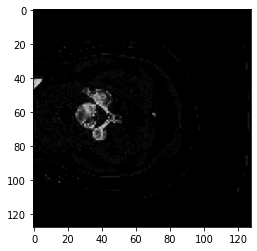

In [50]:
for i in dataset1.take(9):
    plt.imshow(i[0]["input_1"][60])

Exception ignored in: <generator object data_gen at 0x7f6667dfe050>
RuntimeError: generator ignored GeneratorExit


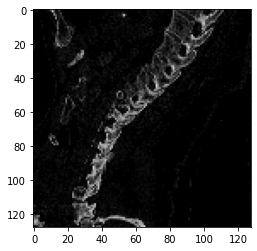

In [51]:
for i in dataset.take(9):
    plt.imshow(i[0]["input_1"][40])

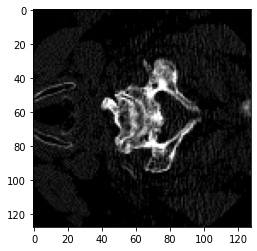

In [42]:
ct = nib.load("../input/cervical-ct-preprocessing/1.2.826.0.1.3680043.10842.nii.gz")
ct = ct.get_fdata()
ct = np.transpose(ct, axes=[1,0,2])
extracted_features = tf.stack([ct,ct,ct],axis=-1)
plt.imshow(extracted_features[90])

In [56]:
def data_gen2():
    df = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/train.csv")
    for i in random_n_image_list[:1800]:
        path = "../input/cervical-ct-preprocessing/" + str(df.iloc[i]["StudyInstanceUID"]) +".nii.gz"
        try:
            ct = nib.load(path)
            ct = ct.get_fdata()
    #             sagital
            extracted_features = res(tf.stack([ct,ct,ct],axis=-1))[:,...]

    #             axial
            ct = np.transpose(ct, axes=[1,0,2])
            extracted_features1 = res(tf.stack([ct,ct,ct],axis=-1))
    
            yield ({"input_1": extracted_features, "input_2": extracted_features1}, 
                   {'co': df.iloc[i]["patient_overall"], 
                                    'c1': df.iloc[i]["C1"],
                                    'c2': df.iloc[i]["C2"],
                                    'c3': df.iloc[i]["C3"],
                                    'c4': df.iloc[i]["C4"],
                                    'c5': df.iloc[i]["C5"],
                                    'c6': df.iloc[i]["C6"],
                                    'c7': df.iloc[i]["C7"],},
                   {'co': 3, 
                                    'c1': 1,
                                    'c2': 1,
                                    'c3': 1,
                                    'c4': 1,
                                    'c5': 1,
                                    'c6': 1,
                                    'c7': 1})
                
        except:
            continue

            
            
def test_gen2():
    df = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/train.csv")
    for i in random_n_image_list[1800:]:
        path = "../input/cervical-ct-preprocessing/" + str(df.iloc[i]["StudyInstanceUID"]) +".nii.gz"
        try:
            ct = nib.load(path)
            ct = ct.get_fdata()
    #             sagital
            extracted_features = res(tf.stack([ct,ct,ct],axis=-1))[:,...]

    #             axial
            ct = np.transpose(ct, axes=[1,0,2])
            extracted_features1 = res1(tf.stack([ct,ct,ct],axis=-1))
    
            yield ({"input_1": extracted_features, "input_2": extracted_features1}, 
                   {'co': df.iloc[i]["patient_overall"], 
                                    'c1': df.iloc[i]["C1"],
                                    'c2': df.iloc[i]["C2"],
                                    'c3': df.iloc[i]["C3"],
                                    'c4': df.iloc[i]["C4"],
                                    'c5': df.iloc[i]["C5"],
                                    'c6': df.iloc[i]["C6"],
                                    'c7': df.iloc[i]["C7"],},
                   {'co': 3, 
                                    'c1': 1,
                                    'c2': 1,
                                    'c3': 1,
                                    'c4': 1,
                                    'c5': 1,
                                    'c6': 1,
                                    'c7': 1})
            
        except:
            continue

In [57]:
dataset2 = tf.data.Dataset.from_generator(
     data_gen2,
     ({"input_1":tf.float32, "input_2":tf.float32}, 
     {'co':tf.int8,
     'c1':tf.int8,
     'c2':tf.int8,
     'c3':tf.int8,
     'c4':tf.int8,
     'c5':tf.int8,
     'c6':tf.int8,
     'c7':tf.int8},
     {'co':tf.int8,
     'c1':tf.int8,
     'c2':tf.int8,
     'c3':tf.int8,
     'c4':tf.int8,
     'c5':tf.int8,
     'c6':tf.int8,
     'c7':tf.int8}),
    ({"input_1":tf.TensorShape([128,1408]), "input_2":tf.TensorShape([128,1408])}, 
     {"co": tf.TensorShape([]), 
     "c1": tf.TensorShape([]),
     "c2": tf.TensorShape([]),
     "c3": tf.TensorShape([]),
     "c4": tf.TensorShape([]),
     "c5": tf.TensorShape([]),
     "c6": tf.TensorShape([]),
     "c7": tf.TensorShape([])},
    {"co": tf.TensorShape([]), 
     "c1": tf.TensorShape([]),
     "c2": tf.TensorShape([]),
     "c3": tf.TensorShape([]),
     "c4": tf.TensorShape([]),
     "c5": tf.TensorShape([]),
     "c6": tf.TensorShape([]),
     "c7": tf.TensorShape([])})
)

testset2 = tf.data.Dataset.from_generator(
     test_gen2,
     ({"input_1":tf.float32, "input_2":tf.float32},  
     {'co':tf.int8,
     'c1':tf.int8,
     'c2':tf.int8,
     'c3':tf.int8,
     'c4':tf.int8,
     'c5':tf.int8,
     'c6':tf.int8,
     'c7':tf.int8},
     {'co':tf.int8,
     'c1':tf.int8,
     'c2':tf.int8,
     'c3':tf.int8,
     'c4':tf.int8,
     'c5':tf.int8,
     'c6':tf.int8,
     'c7':tf.int8}),
    ({"input_1":tf.TensorShape([128,1408]), "input_2":tf.TensorShape([128,1408])}, 
     {"co": tf.TensorShape([]), 
     "c1": tf.TensorShape([]),
     "c2": tf.TensorShape([]),
     "c3": tf.TensorShape([]),
     "c4": tf.TensorShape([]),
     "c5": tf.TensorShape([]),
     "c6": tf.TensorShape([]),
     "c7": tf.TensorShape([])},
    {"co": tf.TensorShape([]), 
     "c1": tf.TensorShape([]),
     "c2": tf.TensorShape([]),
     "c3": tf.TensorShape([]),
     "c4": tf.TensorShape([]),
     "c5": tf.TensorShape([]),
     "c6": tf.TensorShape([]),
     "c7": tf.TensorShape([])})
)

In [58]:
dataset2 = (
    dataset2.batch(20)
    .prefetch(1)
)

testset2 = (
    testset2.batch(20)
    .prefetch(1)
)

In [60]:
input1 = keras.Input((128, 1408),name = "input_1")
input2 = keras.Input((128, 1408),name = "input_2")

s = keras.layers.BatchNormalization()(input1)
s = keras.layers.Bidirectional(keras.layers.LSTM(1408, return_sequences=True))(s)
s = keras.layers.Dense(1408, activation='relu')(s)
s = keras.layers.Bidirectional(keras.layers.LSTM(1408, return_sequences=False))(s)

s2 = keras.layers.BatchNormalization()(input2)
s2 = keras.layers.Bidirectional(keras.layers.LSTM(1408, return_sequences=True))(s2)
s2 = keras.layers.Dense(1408, activation='relu')(s2)
s2 = keras.layers.Bidirectional(keras.layers.LSTM(1408, return_sequences=False))(s2)

s3 = keras.layers.Concatenate()([s,s2])

s3 = keras.layers.Dense(512, activation='relu')(s3)
s3 = keras.layers.BatchNormalization()(s3)
s3 = keras.layers.Dense(128, activation='relu')(s3)
s3 = keras.layers.BatchNormalization()(s3)
s3 = keras.layers.Dense(32, activation='relu')(s3)


outputo = keras.layers.Dense(1 ,activation = 'sigmoid', name="co")(s3)
output1 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c1")(s3)
output2 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c2")(s3)
output3 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c3")(s3)
output4 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c4")(s3)
output5 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c5")(s3)
output6 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c6")(s3)
output7 = keras.layers.Dense(1 ,activation = 'sigmoid', name="c7")(s3)
                                               
s_model = keras.models.Model(inputs=[input1, input2], outputs=[outputo,output1,output2,output3,output4,output5,output6,output7])

In [61]:
s_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 1408)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 128, 1408)]  0                                            
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 128, 1408)    5632        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, 128, 1408)    5632        input_2[0][0]                    
____________________________________________________________________________________________

In [62]:
opt = tfa.optimizers.AdamW(
    weight_decay=1e-4,
    learning_rate = 0.001,
    beta_1 = 0.9,
    beta_2 = 0.999,
    epsilon = 1e-07,
    name = 'AdamW',
)
loss = tf.keras.losses.BinaryCrossentropy(
#     label_smoothing=0.1, 
    reduction=tf.keras.losses.Reduction.AUTO,
    name='binary_crossentropy'
)
metrics = [tf.keras.metrics.AUC()]
s_model.compile(optimizer=opt,
              loss={"co": loss, 
                   "c1": loss,
                   "c2": loss,
                   "c3": loss,
                   "c4": loss,
                   "c5": loss,
                   "c6": loss,
                   "c7": loss,},
                metrics={"co": metrics, 
                   "c1": metrics,
                   "c2": metrics,
                   "c3": metrics,
                   "c4": metrics,
                   "c5": metrics,
                   "c6": metrics,
                   "c7": metrics,})

In [63]:
!mkdir final_model

In [64]:
model_checkpoint_callback_LASSO = tf.keras.callbacks.ModelCheckpoint(
    filepath = './final_model/model',
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="auto",
)

In [65]:
history = s_model.fit(dataset2, validation_data = testset2, epochs=5, callbacks=[model_checkpoint_callback_LASSO])

Epoch 1/5
90/90 [==============================] - 1095s 12s/step - loss: 5.4001 - co_loss: 2.2562 - c1_loss: 0.3253 - c2_loss: 0.5128 - c3_loss: 0.2547 - c4_loss: 0.2882 - c5_loss: 0.5131 - c6_loss: 0.6182 - c7_loss: 0.6317 - c7_c6_c5_c4_c3_c2_c1_co_auc_3: 0.6523 - val_loss: 5.2028 - val_co_loss: 2.2626 - val_c1_loss: 0.4634 - val_c2_loss: 0.4924 - val_c3_loss: 0.1860 - val_c4_loss: 0.1895 - val_c5_loss: 0.3073 - val_c6_loss: 0.4487 - val_c7_loss: 0.8529 - val_c7_c6_c5_c4_c3_c2_c1_co_auc_3: 0.6347
Epoch 2/5
90/90 [==============================] - 979s 11s/step - loss: 4.4760 - co_loss: 2.1448 - c1_loss: 0.2858 - c2_loss: 0.4275 - c3_loss: 0.1637 - c4_loss: 0.2251 - c5_loss: 0.3017 - c6_loss: 0.4191 - c7_loss: 0.5084 - c7_c6_c5_c4_c3_c2_c1_co_auc_3: 0.7240 - val_loss: 8.9948 - val_co_loss: 4.5096 - val_c1_loss: 2.1607 - val_c2_loss: 0.4624 - val_c3_loss: 0.2476 - val_c4_loss: 0.1855 - val_c5_loss: 0.2788 - val_c6_loss: 0.5147 - val_c7_loss: 0.6353 - val_c7_c6_c5_c4_c3_c2_c1_co_auc_3: 

KeyboardInterrupt: 